# Simplyfied geologic model of a volcanic diatreme structure in a layered subsurface

## written by Anton Ziegon

<div class="alert alert-info">
<h4>Summary of this script</h4>
    
In this script a simple layered subsurface model will be created consisting of a shallow ``soil`` layer and an underlying (partly loose) ``sandstone`` layer. Below that we find a bigger formation of ``consolidated sandstone`` (hard). At a depth of around ``-55m`` the ``basement`` appears. 

A second easy model of a ``volcanic diatreme`` (cone like structure) will be created. In the end both models will be combined such that we end up with a section that shows a diatreme structure in a layered subsurface. 
    
In order to use this model  as the input model for the following forward calculations performed in ``pygimli``, the resulting 2D Gempy cross-section will be converted to a pygimli mesh and saved.
</div>

In [1]:
# Importing Gempy
import  gempy                   as     gp
from    gempy.core.grid_modules import section_utils

# Importing pygimli
import  pygimli                 as     pg
import  pygimli.meshtools       as     mt

# Importing auxiliary libraries
import  numpy                   as     np
import  pandas                  as     pd
import  matplotlib.pyplot       as     plt
from    matplotlib.patches      import PathPatch 
import  os
from    IPython.display         import set_matplotlib_formats
from    pyvista                 import set_plot_theme

set_plot_theme('document')
plt.rcParams["figure.figsize"] = (20,20)
%matplotlib inline

# Setting options
np.random.seed(420)
pd.set_option('precision', 2)

Not subsurface compatibility available


### Model Parameters

In [2]:
# extent
x0 = 0
x1 = 150
y0 = 0
y1 = 150 
z0 = -60
z1 = 5
# resolution
nx = 120
ny = 120
nz = 200

section_idx = int(50 / ((y1-y0)/ny)) # to get y value that intersects close to cone axis

### Creating layered subsurface model

In [3]:
geo_model_layers = gp.create_model('simple_layers')

# Importing the data from CSV-files and setting extent and resolution
gp.init_data(geo_model_layers, [x0, x1, y0, y1, z0, z1], [nx,ny,nz],
             path_i='Gempy-input/RM_surface_points_layers.csv', path_o='Gempy-input/RM_orientations_layers.csv',
             default_values=True)

# Mapping layers to surface
gp.map_stack_to_surfaces(geo_model_layers,
                         {"Layers":('Soil','SS','CSS','basement')},
                         remove_unused_series=True)

# Adjusting colors
geo_model_layers.surfaces.colors.change_colors({'CSS': '#8b4513','SS':'#ff9912',
                                                'basement':'#8b8878','Soil':'#bcee68'})

# # Adding Topography
# geo_model_layers.set_topography(source='saved', filepath='model_topo.npy')

# Adding cross-section
section_dict = {'section1': ([x0, 50], [x1, 50], [nx, nz])}
geo_model_layers.set_section_grid(section_dict)

# Visualization of data points
# plot = gp.plot_2d(geo_model_layers, show_lith=False, show_boundaries=False, show_topography=False,
#                   cell_number=section_idx, section_names=['topography'])
# gpv = gp.plot_3d(geo_model_layers, image=False, plotter_type='basic', show_topography=False)

Active grids: ['regular']
Active grids: ['regular' 'sections']


,start,stop,resolution,dist
section1,"[0, 50]","[150, 50]","[120, 200]",150.0


Set interpolator and solve model

In [4]:
gp.set_interpolator(geo_model_layers, compile_theano=True, theano_optimizer='fast_compile')
sol_layers = gp.compute_model(geo_model_layers, debug=False)

Setting kriging parameters to their default values.
Compiling theano function...


C:\Users\azieg\anaconda3\envs\agp\lib\site-packages\theano\scan_module\scan_perform_ext.py:75: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  warnings.warn(
C:\Users\azieg\anaconda3\envs\agp\lib\site-packages\theano\scan_module\scan_perform_ext.py:75: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  warnings.warn(
C:\Users\azieg\anaconda3\envs\agp\lib\site-packages\theano\scan_module\scan_perform_ext.py:75: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are prob

Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                   values
range             221.87
$C_o$            1172.02
drift equations      [3]


Resulting 3D model

In [5]:
#ver, sim = gp.get_surfaces(geo_model_layers)
#gpv = gp.plot_3d(geo_model_layers, show_data=True, show_lith=True, image=False, plotter_type='background')

Resulting 2D section through 20th y-value (should be at 50,...)

C:\Users\azieg\anaconda3\envs\agp\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


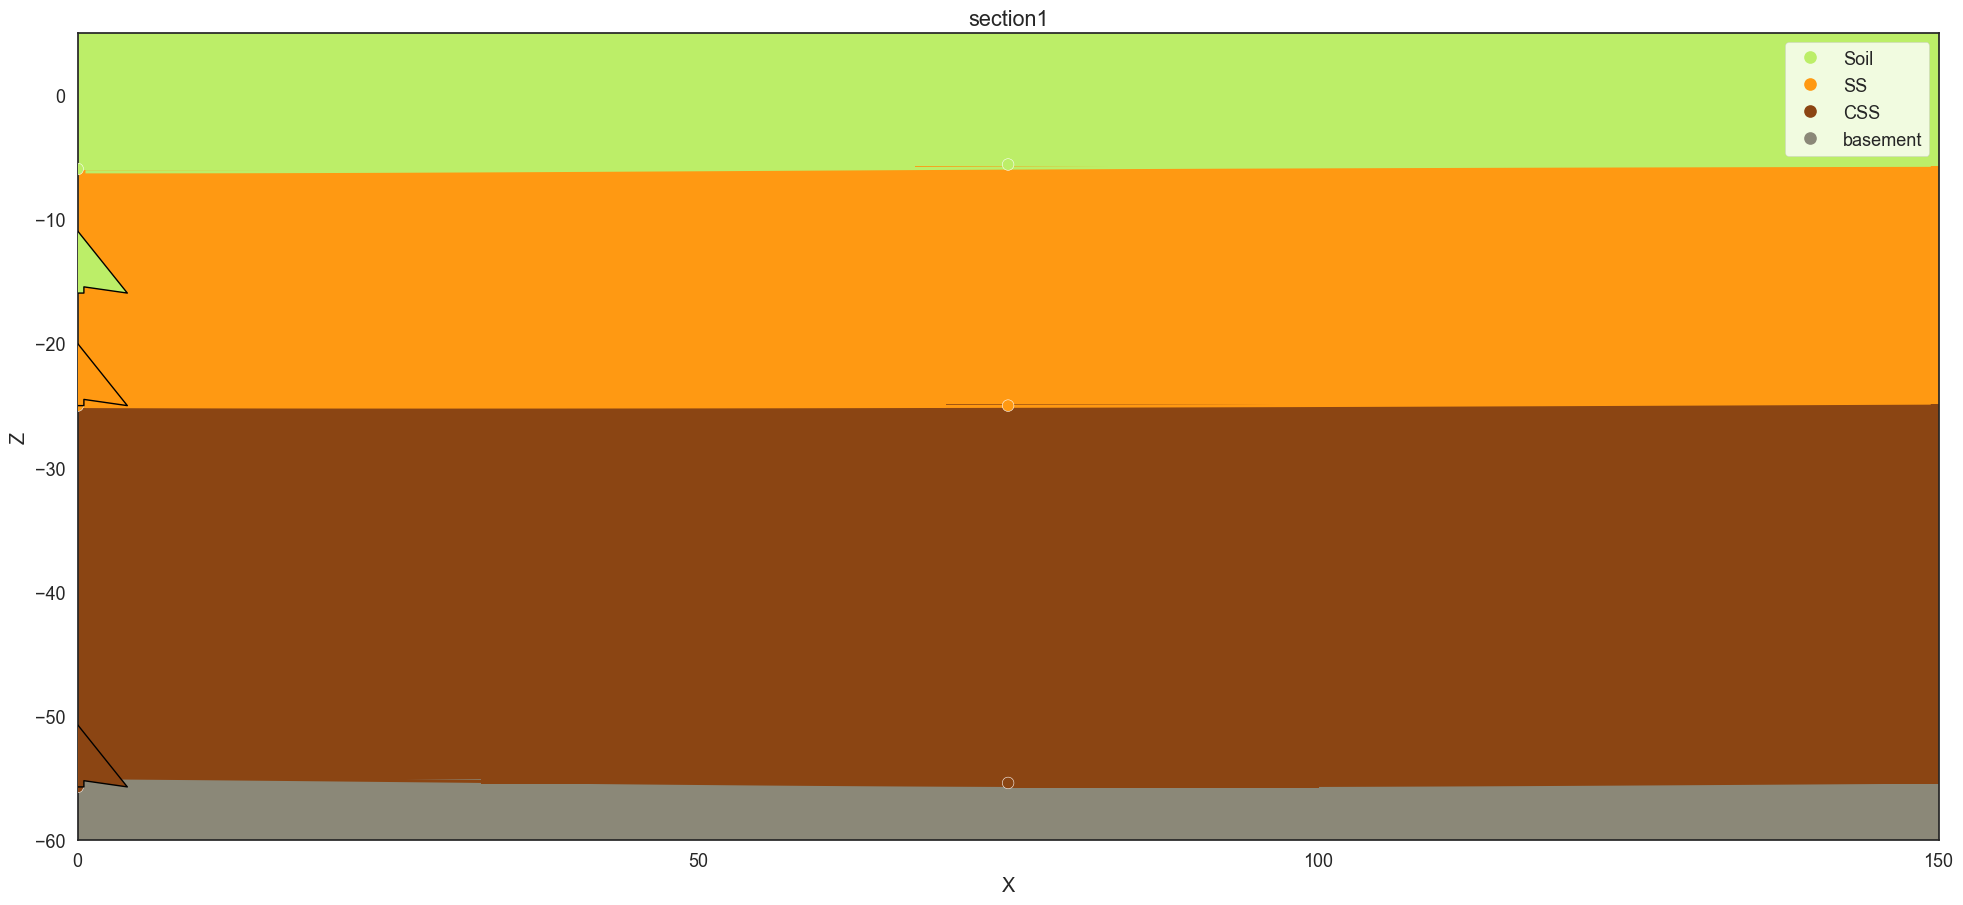

In [6]:
# gp.plot_2d(geo_model_layers, show_data=False, direction='y', cell_number=section_idx,
#            plot_data=True)
gp.plot_2d(geo_model_layers, section_names=['section1'])

### Creating simple diatreme model

In [7]:
geo_model_diatreme = gp.create_model('simple_diatreme')

# Importing the data from CSV-files and setting extent and resolution
gp.init_data(geo_model_diatreme, [x0, x1, y0, y1, z0, z1], [nx,ny,nz],
             path_i='Gempy-input/RM_surface_points_diatreme_easy.csv', path_o='Gempy-input/RM_orientations_diatreme_easy.csv',
             default_values=True)

# Mapping layers to surface
gp.map_stack_to_surfaces(geo_model_diatreme,
                         {"Lith":('Diatreme','basement')},
                         remove_unused_series=True)

# Adding section
geo_model_diatreme.set_section_grid(section_dict)

# Visualization of data points
#plot = gp.plot_2d(geo_model_diatreme, show_lith=False, show_boundaries=False, show_topography=False)
#gpv = gp.plot_3d(geo_model_diatreme, image=False, plotter_type='background', show_topography=False)

Active grids: ['regular']
Active grids: ['regular' 'sections']


,start,stop,resolution,dist
section1,"[0, 50]","[150, 50]","[120, 200]",150.0


Set interpolator and solve model

In [8]:
gp.set_interpolator(geo_model_diatreme, compile_theano=True, theano_optimizer='fast_compile')
sol_diatreme = gp.compute_model(geo_model_diatreme, debug=False)

Setting kriging parameters to their default values.
Compiling theano function...


C:\Users\azieg\anaconda3\envs\agp\lib\site-packages\theano\scan_module\scan_perform_ext.py:75: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  warnings.warn(
C:\Users\azieg\anaconda3\envs\agp\lib\site-packages\theano\scan_module\scan_perform_ext.py:75: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  warnings.warn(
C:\Users\azieg\anaconda3\envs\agp\lib\site-packages\theano\scan_module\scan_perform_ext.py:75: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are prob

Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                   values
range             221.87
$C_o$            1172.02
drift equations      [3]


Resulting 3D model

In [9]:
#ver, sim = gp.get_surfaces(geo_model_diatreme)
#gpv = gp.plot_3d(geo_model_diatreme, show_data=False, show_lith=False, image=False, plotter_type='background')

Resulting 2D section through 33rd y-value (should be at 50,..)

C:\Users\azieg\anaconda3\envs\agp\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


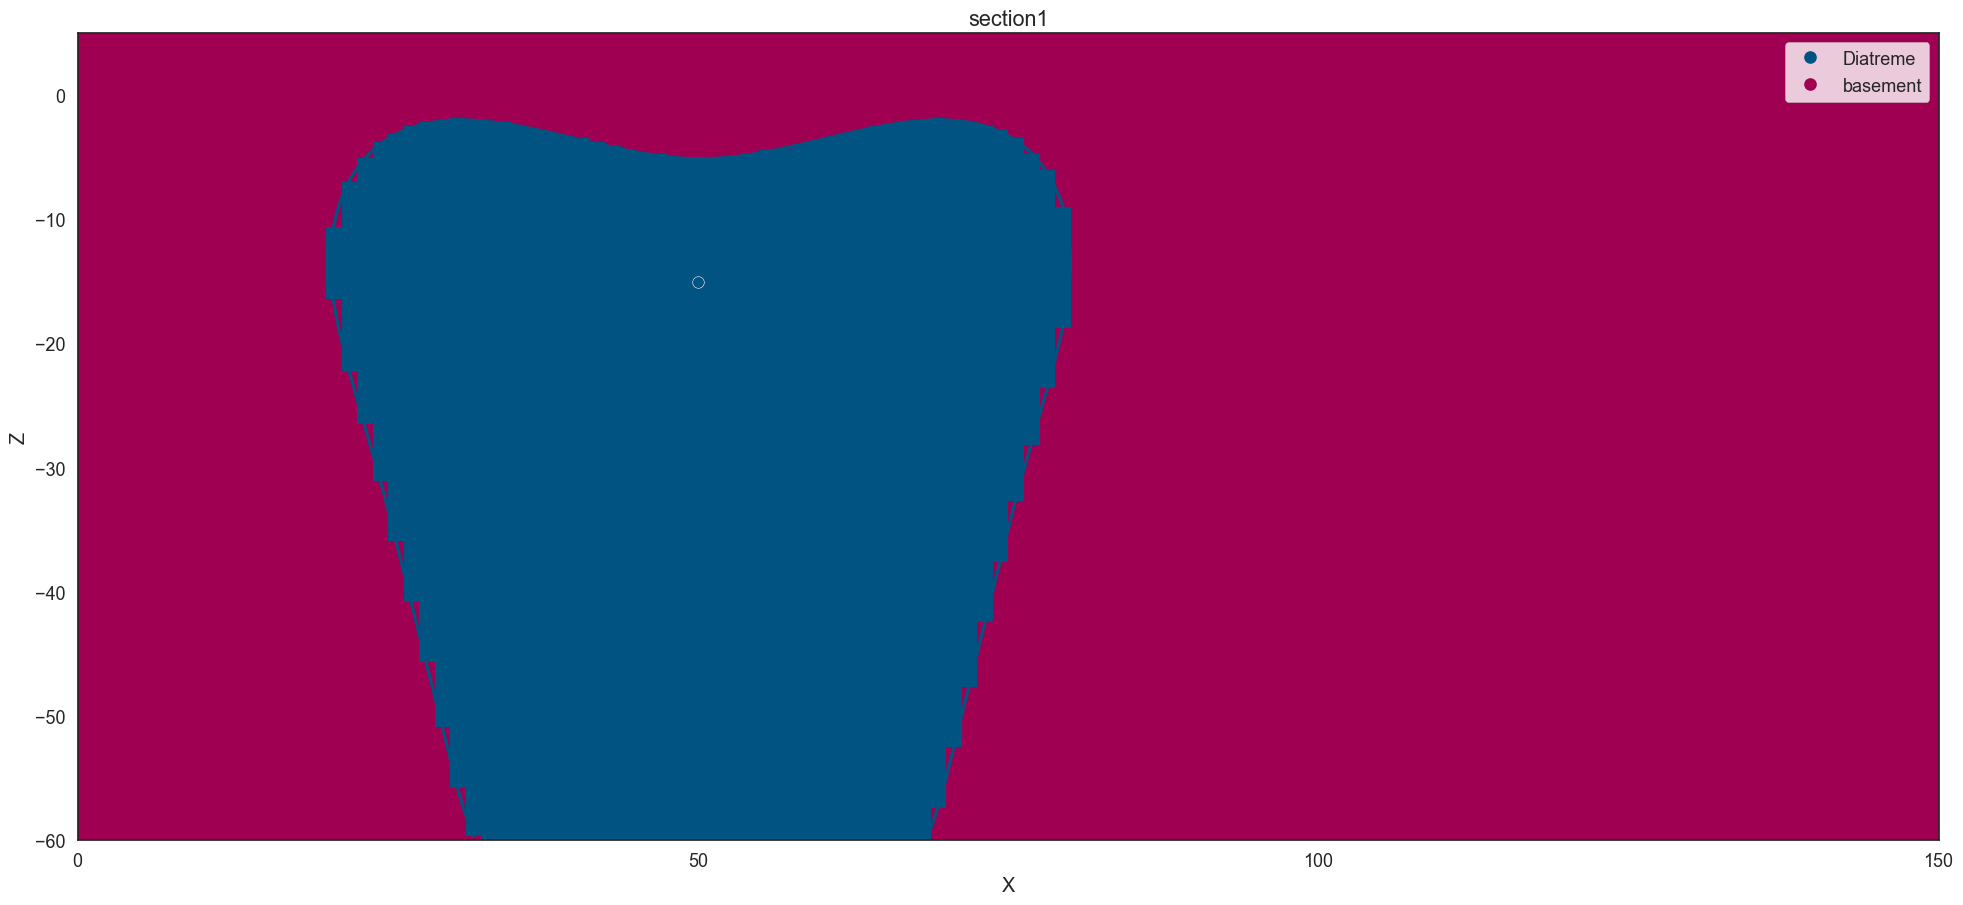

In [10]:
# gp.plot_2d(geo_model_diatreme, show_data=False, direction='y', cell_number=section_idx,
#            plot_data=True, show_topography=False)
gp.plot_2d(geo_model_diatreme, section_names=['section1'])

### Combining both models

In [11]:
geo_model_layers.add_surfaces(['diatreme'])

,surface,series,order_surfaces,color,id
2,Soil,Layers,1,#015482,1
1,SS,Layers,2,#9f0052,2
0,CSS,Layers,3,#ffbe00,3
3,basement,Layers,4,#728f02,4
4,diatreme,Layers,5,#443988,5


C:\Users\azieg\anaconda3\envs\agp\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


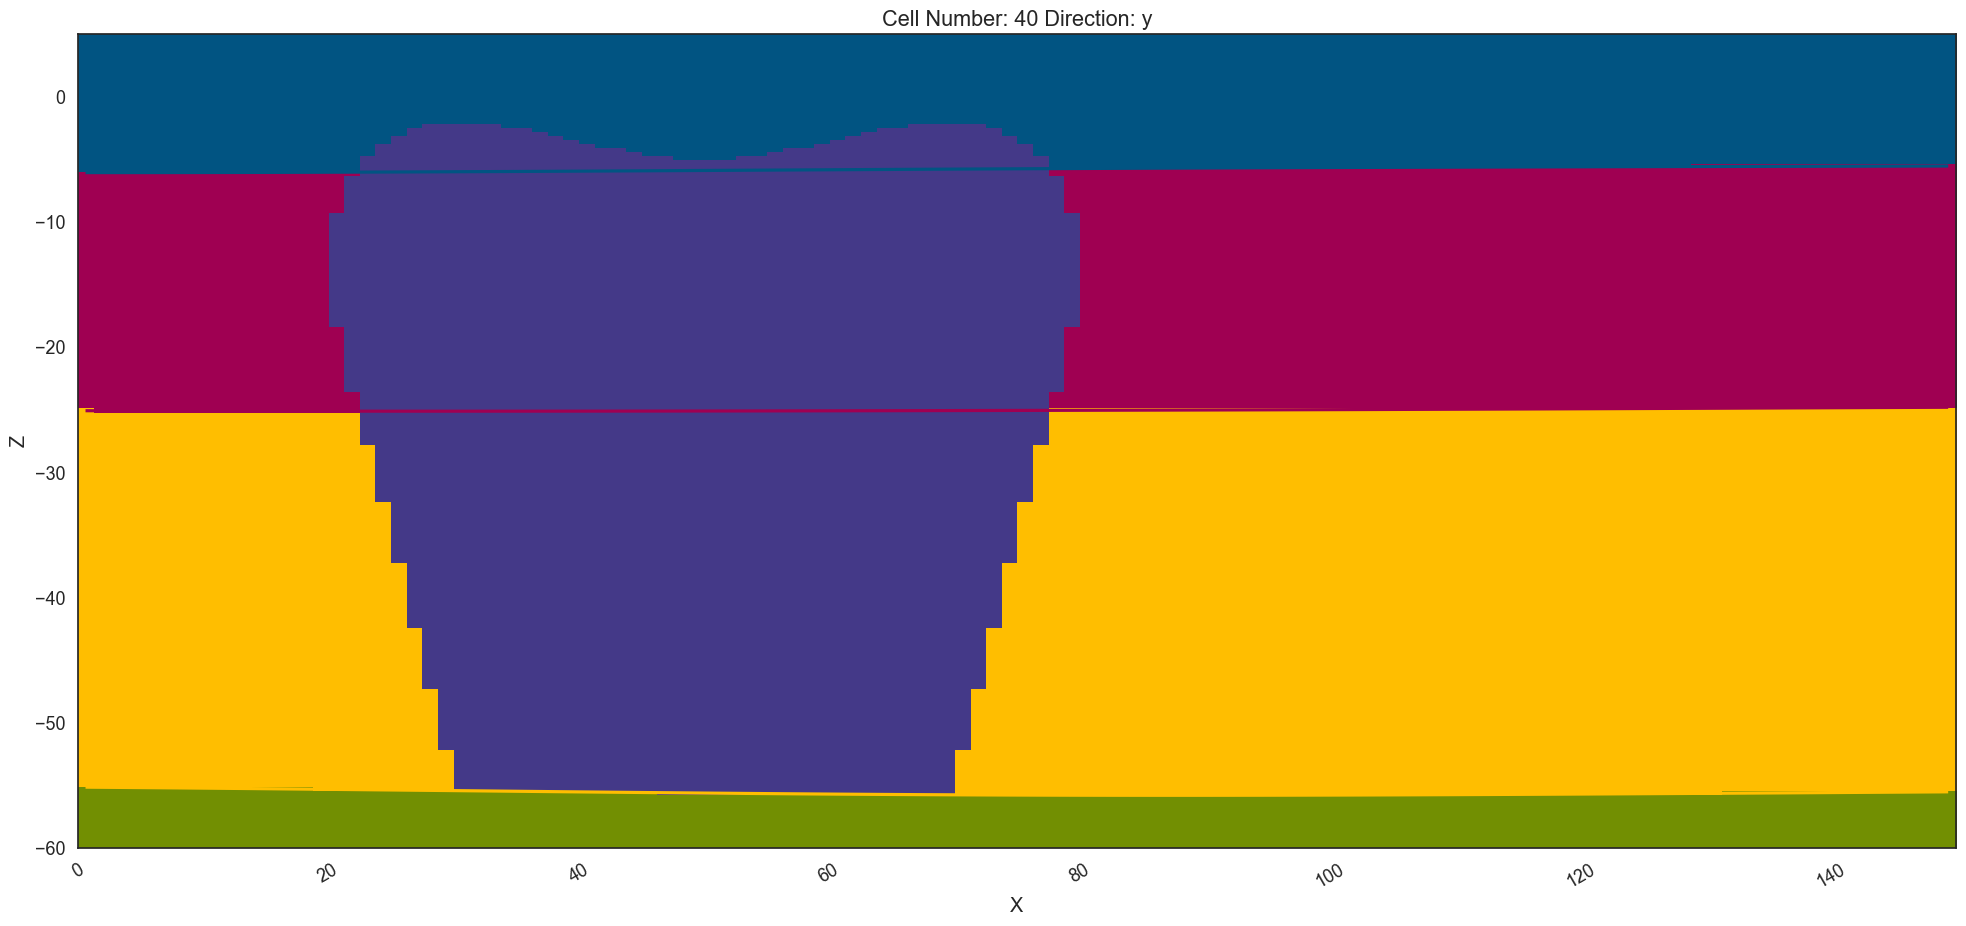

In [12]:
# where do model result voxels have the ID 4 (basement)
inds_bm = np.where(sol_layers.lith_block==4.)
sol_combined = sol_layers

# where do model result voxels have the ID 1 (diatreme structure in diatreme model)
inds = np.where(sol_diatreme.lith_block==1.)
sol_combined.lith_block[inds] = 5.
sol_combined.lith_block[inds_bm] = 4.

# Visual inspection of combined model
gp.plot_2d(geo_model_layers, direction='y', show_block=False, show_boundaries=True, cell_number=section_idx,
           show_data=False, show_results=True, show_topography=False)

In [13]:
# gp.plot_2d(geo_model_layers, direction='y', show_block=True, show_boundaries=False, cell_number=section_idx,
#            show_data=False, show_results=True, show_topography=True, section_names=['topography'])
# plt.savefig('final_model.pdf',format='pdf')

## Transfer the cross section to pyGIMLI (by previous Master student)

<div class="alert alert-info">
<h4>by previous Master student</h4>
The next function provides the transfer of the geometry seen in the cross-section above to a pyGIMLI framework as a piecewise linear complex (PLC). These can easily be saved and loaded with pyGIMLI and used to create unstructured meshes for physical forward calculaions, inversions and other finite element modelling (Darcy flow, heat flow,...).

This is currently achieved by leveraging a GemPy 'section_utils' method, which outputs the 2D-coordinates of the interpolated surfaces as a matplotlib path as of GemPy 2.2.2. The vertices of the path are used to create polygons inside a pyGIMLI world which are marked by integers, referring to the lithological units in the model.

In [14]:
#THIS FUNCTION TAKES A GEMPY MODEL AND PREDEFINED CROSS SECTION
#TO TRANSFER INTO A PYGIMLI-COMPATIBLE PIECEWISE LINEAR COMPLEX (PLC)
def get_geometry(model,section,ignore = [], show = True, zshift = 0, save = None):
    '''model: interpolated GemPy model
       section: predefined cross section in the model
       ignore: list of surfaces that should be excluded from the GIMLI world. Currently the inclusion of faults
       can lead to faulty behaviour when the GIMLI regions are defined.
       show (True): show GIMLI world if True
       zshift: shifts model coordinates downwards by specified amount, sets highest point of PLC at z = 0 if True
       save (None): saves PLC into specified location if not None'''
    
    #First we get the polygon paths from GemPy and order them as MPL Patches in a new dictionary
    verts,colors,extent = section_utils.get_polygon_dictionary(model, section)
    geoms = {form:PathPatch(path[0]) for form,path in verts.items()} 
    
    #Now we get the overall min & max coordinate values to pass the correct bounds (GemPy's extent output includes the model boundaries, the vertex dictionary does not)
    allv = [i.get_verts() for i in geoms.values()] 
    
    xmax = max([max(i[:,0]) for i in allv])
    xmin = min([min(i[:,0]) for i in allv])
    zmax = max([max(i[:,1]) for i in allv])
    zmin = min([min(i[:,1]) for i in allv])
    
    #Setting up vertical shift of the model
    if zshift == True:
        zshift = zmax
        zmin -= zmax
        zmax = 0
    else:
        zmax -= zshift
        zmin -= zshift
        
    
    #Storing in an upper left, lower right-corner list
    realbounds = [[xmin,zmax],[xmax,zmin]]
    
    #Creating empty GIMLI world with the correct boundaries
    world = mt.createWorld((xmin,zmax),(xmax,zmin))
    unit_count = 0 #Counter to correctly mark the regions

    #Looping through the verts dictionary that contains the vertices of each unit
    #Currently using the MPL paths instead of the patches because they offer some features that might come in handy
    for name,unit in verts.items():
        if name not in ignore:
            unit_count += 1
            to_world = np.array([nde[0] for nde in unit[0].iter_segments()])
            to_world[:,1] -= zshift
            
            #Remove redundant end nodes
            if (to_world[0] == to_world[-1]).all():
                    to_world = np.delete(to_world,-1,axis=0)
                    
            #Add surface nodes to pyGIMLI world as a new polygon     
            world += mt.createPolygon(to_world, isClosed = True, marker = unit_count)
    
    if show == True:
        pg.show(world)
        
    if save is not None:
        mt.exportPLC(world, save)
        
    return world

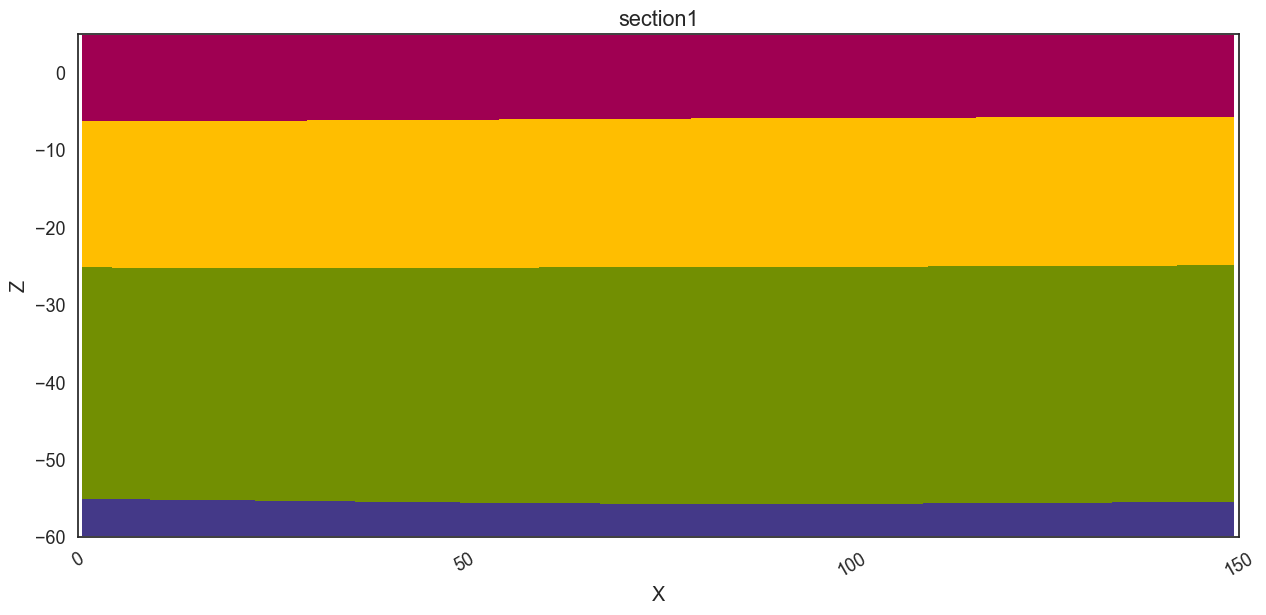

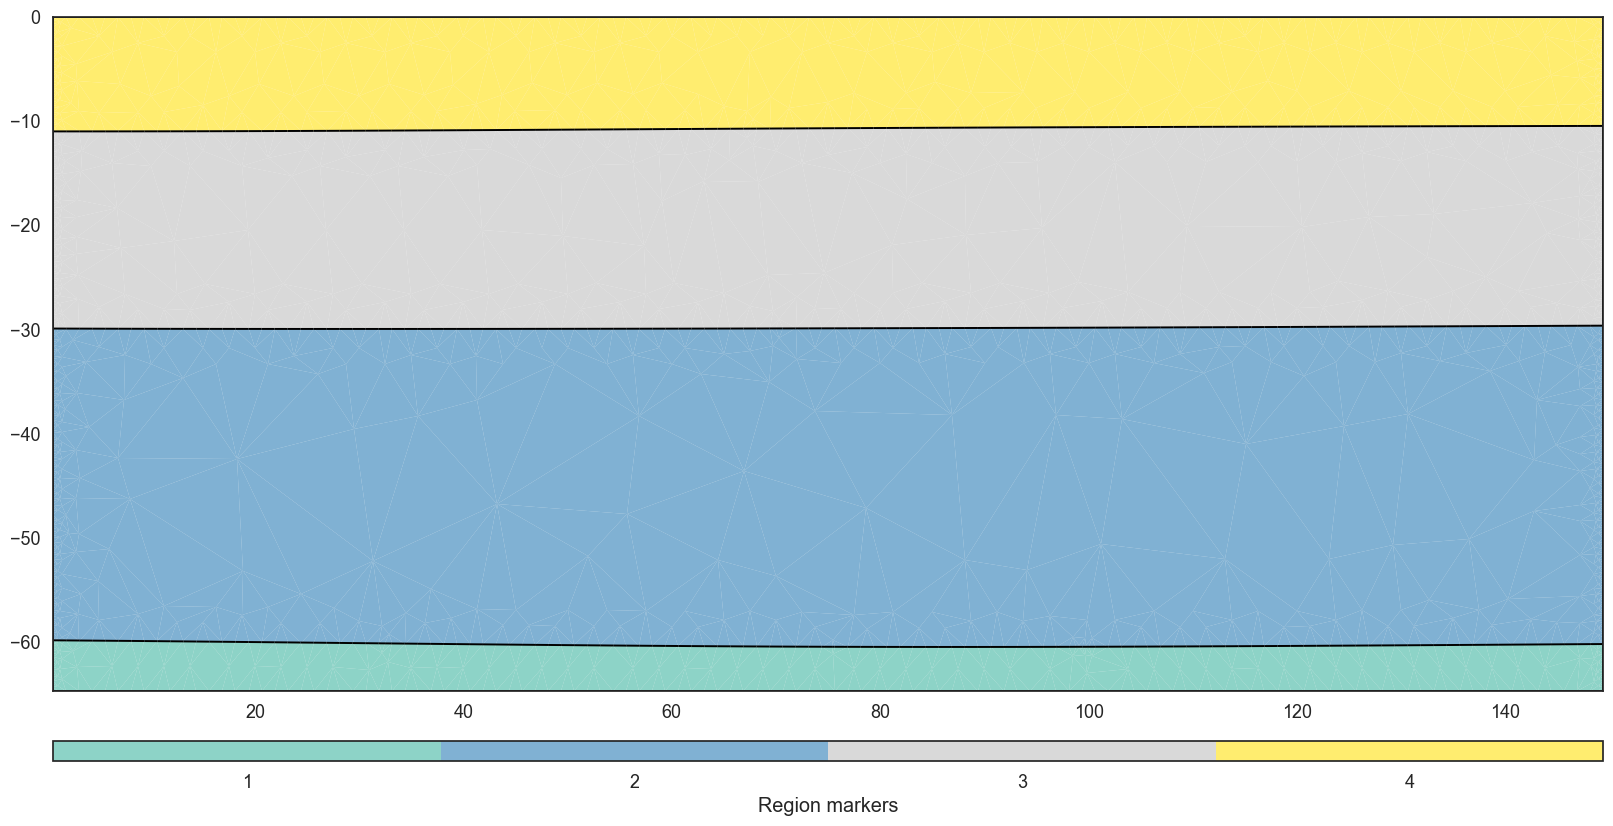

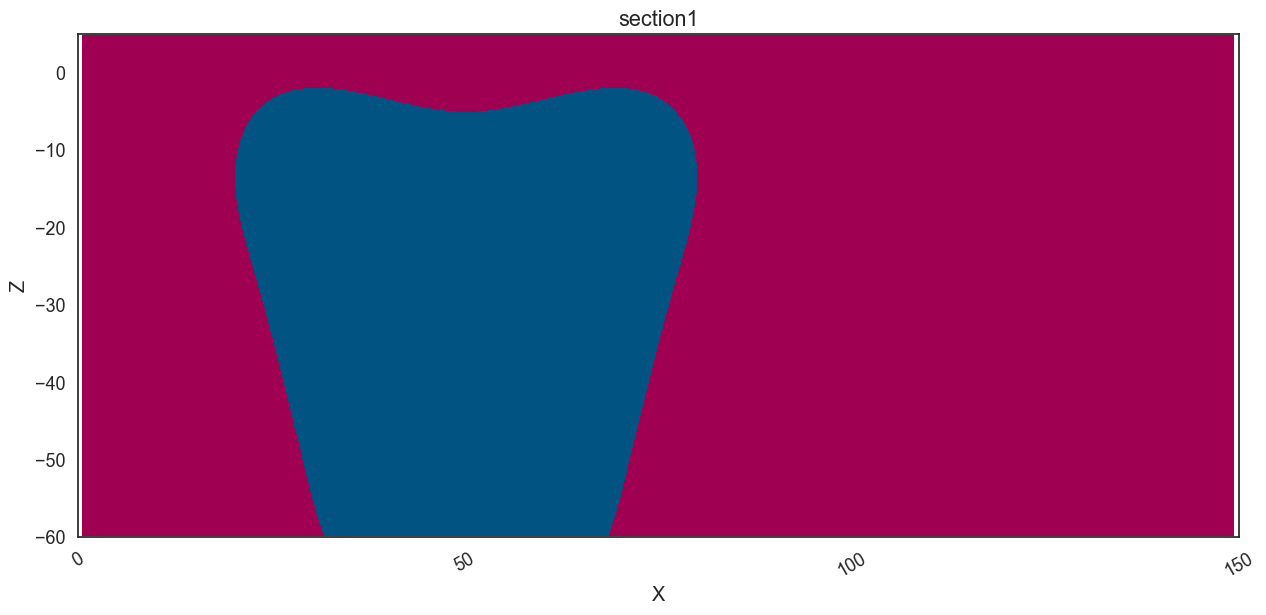

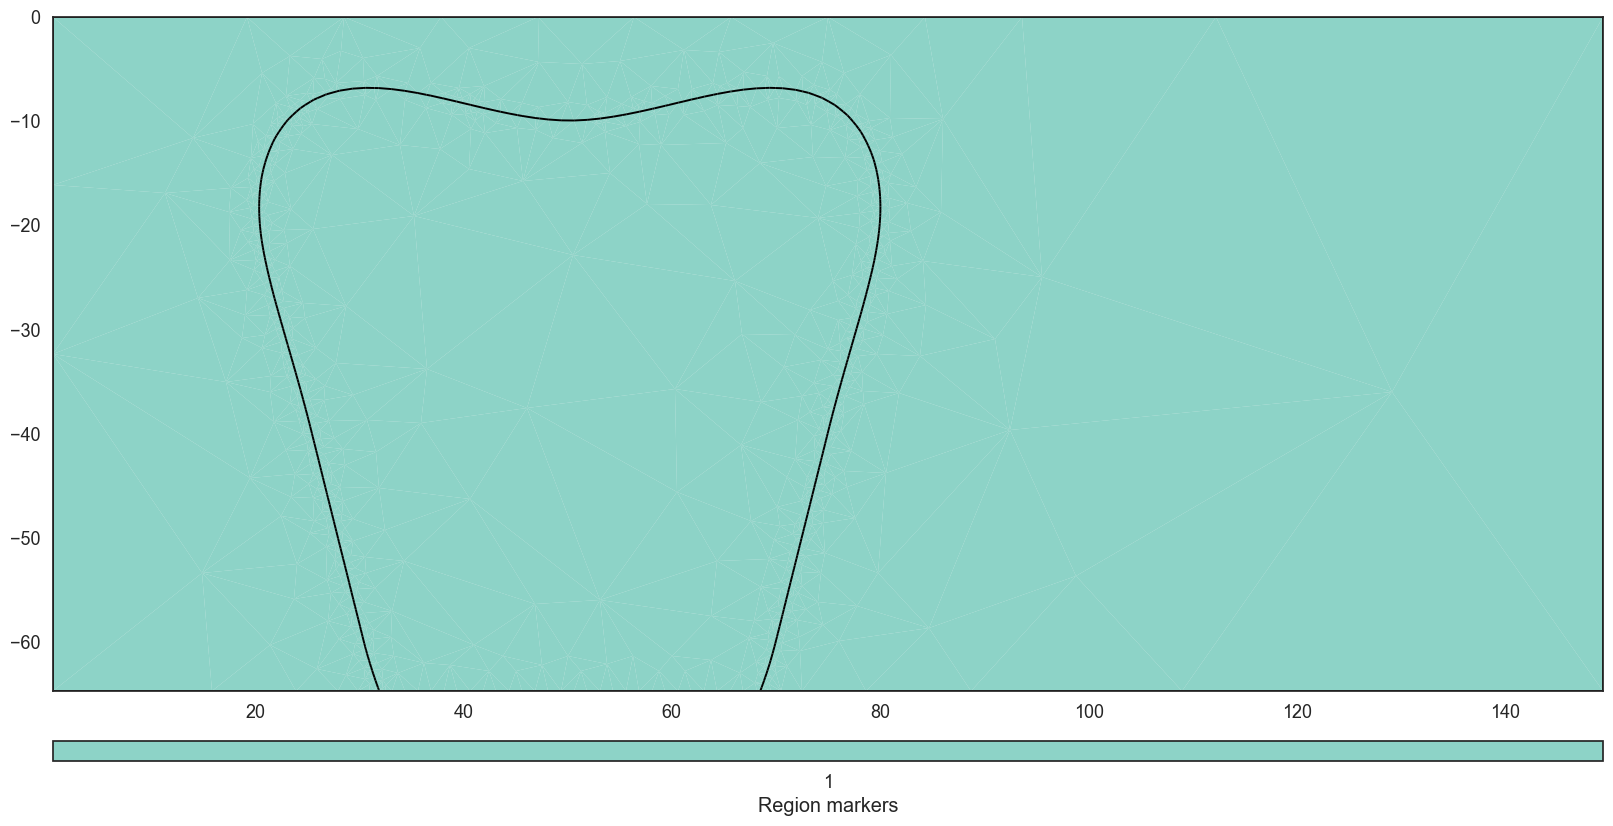

In [37]:
world_layers = get_geometry(geo_model_layers,'section1',ignore = [],zshift = True, show = True)
world_diatreme = get_geometry(geo_model_diatreme,'section1',ignore = ['basement'],zshift = True, show = True)

# pg.meshtools.exportPLC(world_layers, 'mesh_layermodel.poly')
# pg.meshtools.exportPLC(world_diatreme, 'mesh_diatrememodel.poly')

### Combine the two meshes ``world_layers`` and ``world_diatreme`` into a new mesh ``world_combined``.<br>

#### Note
The regions are not correct assigned. The locations of the correct RegionMarkers are shown in the plot below. The corrected mesh is generated with the new RegionMarkers using the ``createGrid()`` command.

In [38]:
#world_combined = world_layers + world_diatreme
world_combined = mt.merge2Meshes(world_layers,world_diatreme)

In [ ]:
mesh = mt.createMesh(world_combined)

In [ ]:
fig, ax = plt.subplots()   
pg.show(world_combined, ax=ax)

NameError: name 'world_combined' is not defined

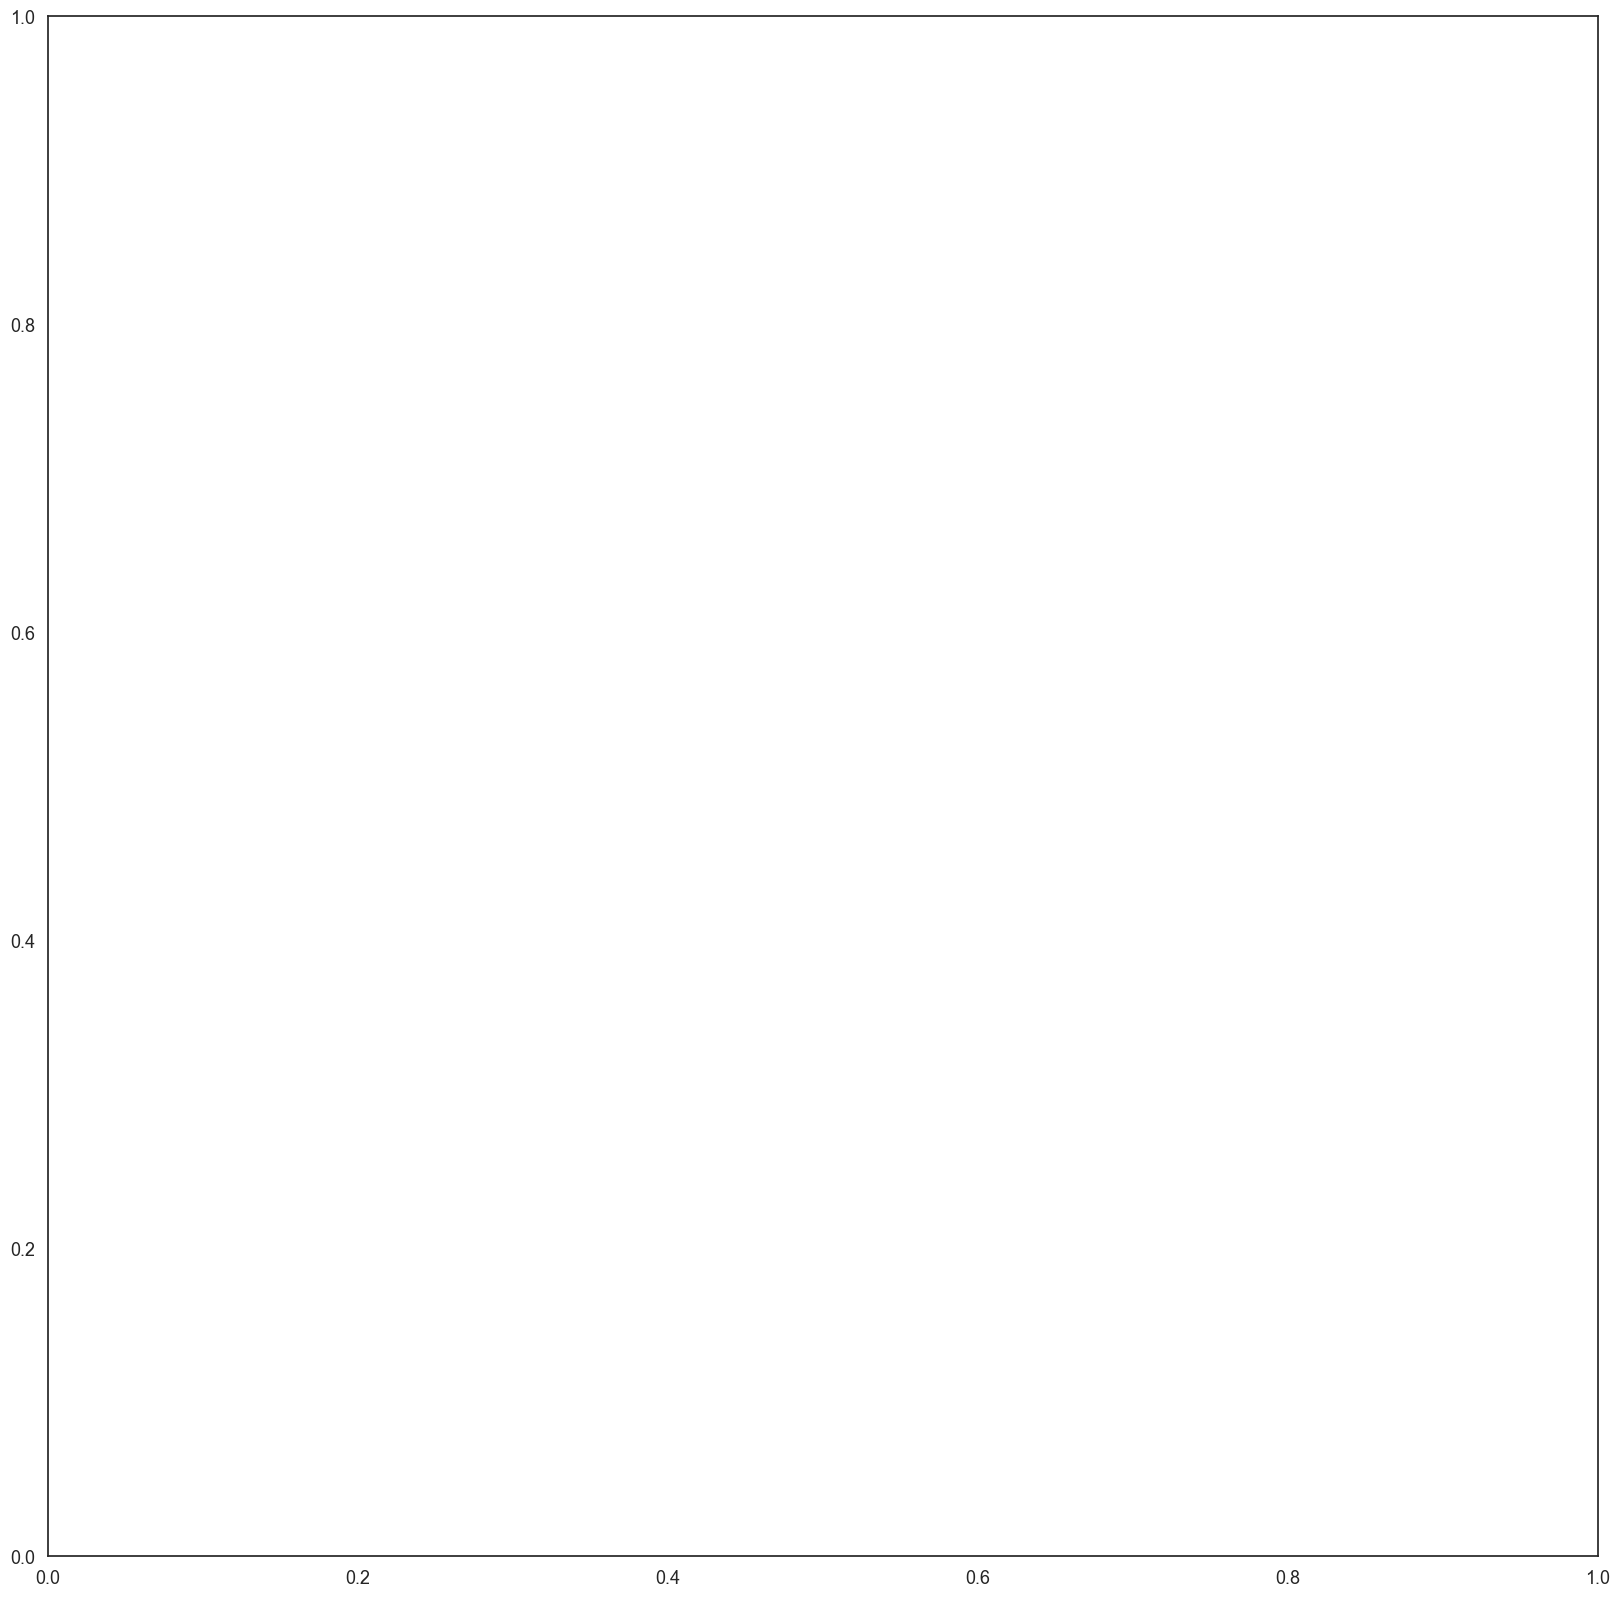

In [16]:
# Show merged mesh
fig, ax = plt.subplots()   
pg.show(world_combined, ax=ax)
ax.set_title('Mesh with wrong Region assignment', fontdict={'fontsize':25})
plt.text(3.2, 33, 'Points represent suitable Positions for RegionMarkers', 
         horizontalalignment='center', bbox=dict(facecolor='white'))
# Positions of RegionMarkers that we would like to insert define regions
# basement
ax.scatter(10,-63,color='r')
ax.scatter(100,-63,color='r')
ax.scatter(35,-63,color='r')
# CSS
ax.scatter(10,-46,color='g')
ax.scatter(100,-46,color='g')
# SS
ax.scatter(10,-21,color='m')
ax.scatter(100,-21,color='m')
# Soil
ax.scatter(10,-6,color='k')
# Diatreme
ax.scatter(35,-46,color='c')
ax.scatter(35,-21,color='c')
ax.scatter(35,-9,color='c')

In [17]:
# basement
world_combined.addRegionMarker([10,-63], 1)
world_combined.addRegionMarker([100,-63], 1)
world_combined.addRegionMarker([35,-63], 1)
# CSS
world_combined.addRegionMarker([10,-46], 2)
world_combined.addRegionMarker([100,-46], 2)
# SS
world_combined.addRegionMarker([10,-21], 3)
world_combined.addRegionMarker([100,-21], 3)
# Soil
world_combined.addRegionMarker([10,-6], 4)
# Diatreme
world_combined.addRegionMarker([35,-46], 5)
world_combined.addRegionMarker([35,-21], 5)
world_combined.addRegionMarker([35,-9], 5)

In [ ]:
# Create new mesh with corrected regions
# mt.createMesh(world_combined)
fig, ax = plt.subplots()   
pg.show(world_combined, ax=ax)
ax.set_title('Mesh with correct Region assignment', fontdict={'fontsize':25})
# Notes
plt.text(2.8, 34, 'Soil', horizontalalignment='center', bbox=dict(facecolor='magenta', alpha=0.5))
plt.text(3, 26, 'SS', horizontalalignment='center', bbox=dict(facecolor='green', alpha=0.5))
plt.text(3.2, 13, 'CSS', horizontalalignment='center', bbox=dict(facecolor='red', alpha=0.5))
plt.text(3.3, 4.3, 'Basement', horizontalalignment='center', bbox=dict(facecolor='cyan', alpha=0.5))
plt.text(1.3, 26, 'Diatreme', horizontalalignment='center', bbox=dict(facecolor='yellow', alpha=0.5))

Save the finished combined mesh:

In [19]:
pg.meshtools.exportPLC(world_combined, 'mesh_combinedmodel.poly')

(<AxesSubplot:>, None)

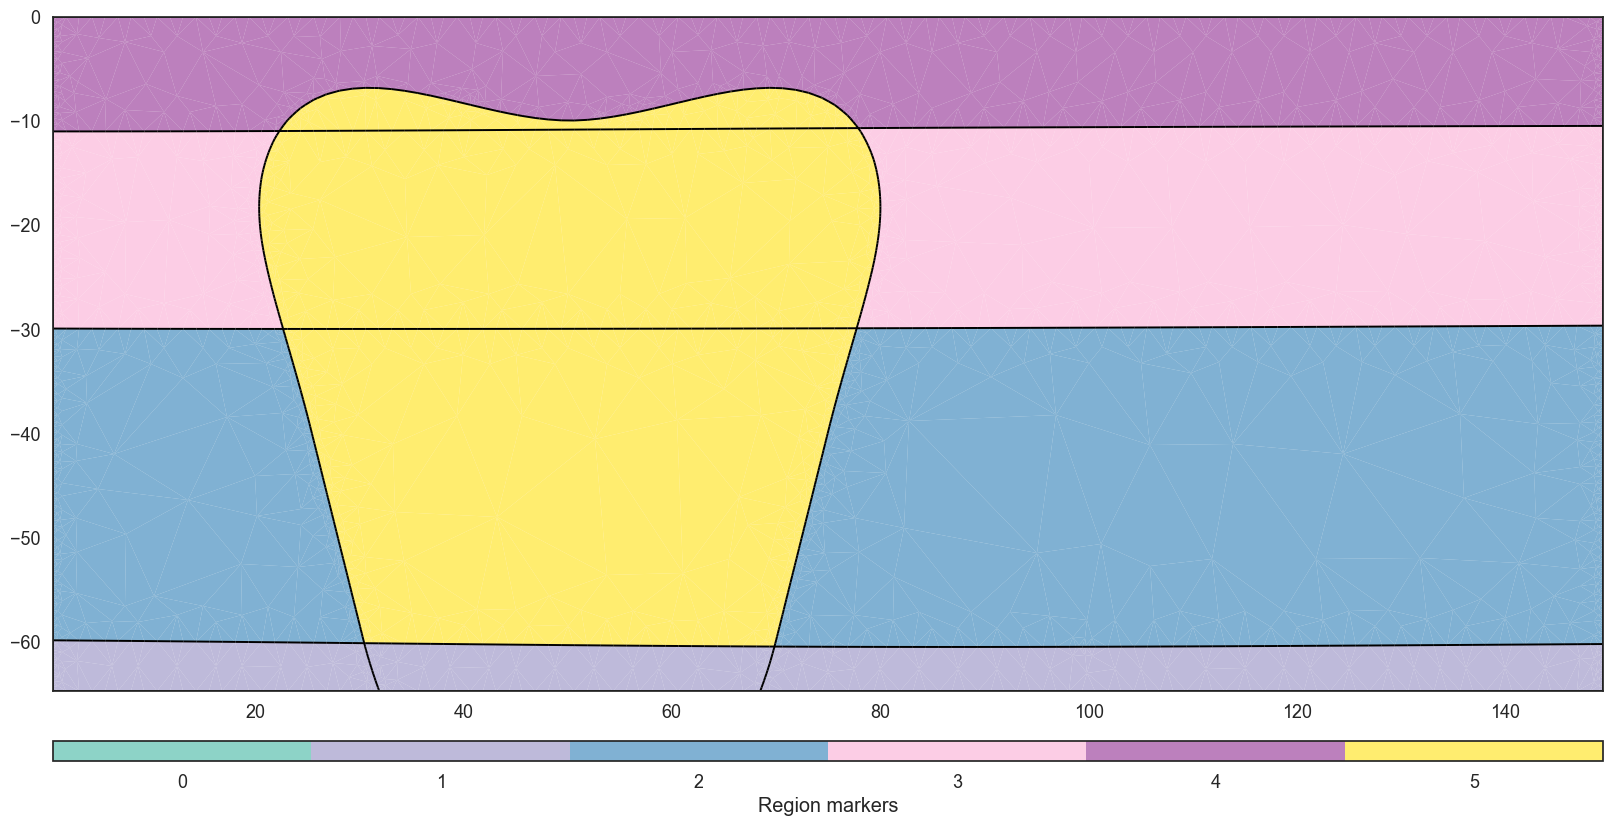

In [20]:
# Reading in saved model for QC
loaded_world = pg.meshtools.readPLC('mesh_combinedmodel.poly')
fig, ax = plt.subplots()   
pg.show(loaded_world, ax=ax)

<div class="alert alert-info">
<h4>Concluding Note</h4>
The model created in this notebook will be used for pygimli forward simulations.
This will be done in another notebook.